# `20180216a` - Testing pulser and ADC

In [80]:
# Basic math
import math
import os
# Signal processing
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
# Custom lib
import ustk as USTk # Ultrasound toolkit

## Preparing the data

Let's unpack what has been acquired by the ADC pHAT.

B33.DAT
B33.DAT


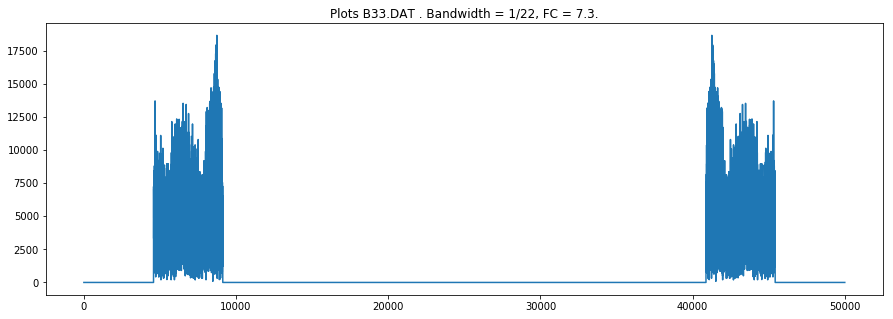

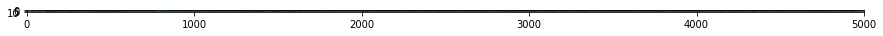

In [91]:
for filename in os.listdir("./data/"):
    if filename.endswith(".DAT"):
        DATFile = os.path.join("", filename).split(".")[0]
        if not os.path.isfile(DATFile+".npz"):
            print DATFile+".DAT"
            Arf = USTk.CreateUsPack(DATFile+".DAT") 

## Working on a specific file

In [92]:
DATFile = "A33"
DATA = np.load(DATFile+".npz") 
DATA.keys()
Image, rawSignal = DATA['arr_1'], DATA['arr_0']

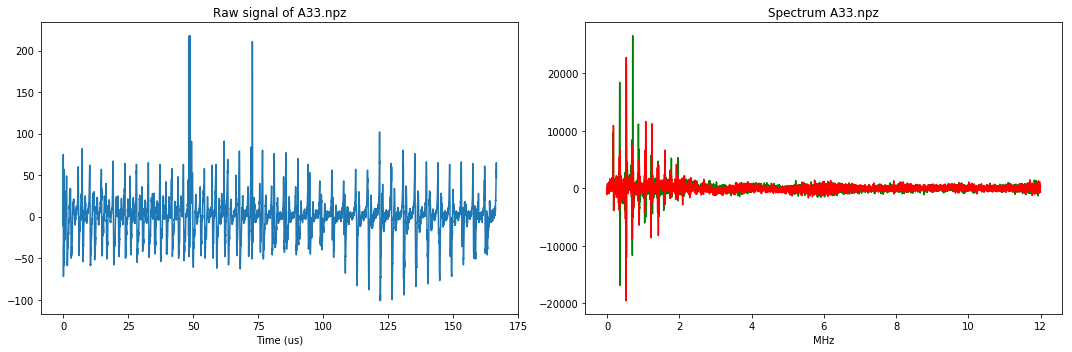

In [93]:
N = 3
plt.figure(figsize=(15,5))
line = rawSignal[N*5000:(N+1)*5000]
F = 12 # acquisition speed in MHz
plt.subplot(1, 2, 1)
plt.title("Raw signal of "+DATFile+".npz")
ff = [ 2*x*1000.0/(F*len(line)) for x in range(len(line))]

plt.plot(ff,line)
plt.xlabel("Time (us)")

plt.subplot(1, 2, 2)
plt.title("Spectrum "+DATFile+".npz")
fftline = np.fft.fft(line)
ff = [ 12*2.0*x/(len(line)) for x in range(len(line))]
plt.plot(ff[0:len(line)/2],np.real(fftline)[0:len(line)/2],"g")
plt.plot(ff[0:len(line)/2],np.imag(fftline)[0:len(line)/2],"r")
plt.xlabel("MHz")

plt.tight_layout()
plt.savefig("lines/"+DATFile+"_line"+str(N)+"sample.jpg", bbox_inches='tight')
plt.show()

## Cleaning the signal around the frequency of the piezo

In [94]:
line2 = fftline
for i in range(len(line2)/2+3):
    if i < 350 or i > 1300:
        line2[i] = 0
        line2[-i] = 10
line3 = np.fft.ifft(line2)
lineU = np.real(line3)
analytic_signal = hilbert(lineU)
amplitude_envelope = np.abs(analytic_signal)

#### Representation

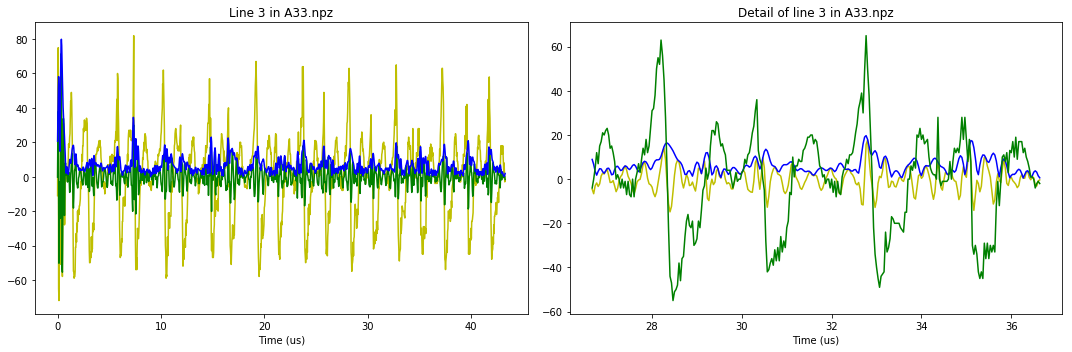

In [95]:
F = 12 # acquisition speed in MHz
ff = [ 2*x*1000.0/(F*len(line)) for x in range(len(line))]

plt.figure(figsize=(15,5)) 
plt.subplot(1, 2, 1)
plt.title("Line "+str(N)+" in "+DATFile+".npz")
plt.plot(ff[0:1300],np.real(line[0:1300]),"y")
plt.plot(ff[0:1300],(analytic_signal[0:1300]),"g")
plt.plot(ff[0:1300],(amplitude_envelope[0:1300]),"b")
plt.xlabel("Time (us)") 

plt.subplot(1, 2, 2)
plt.title("Detail of line "+str(N)+" in "+DATFile+".npz")
plt.plot(ff[800:1100],(analytic_signal[800:1100]),"y")
plt.plot(ff[800:1100],(amplitude_envelope[800:1100]),"b")
plt.plot(ff[800:1100],np.real(line[800:1100]),"g")
plt.xlabel("Time (us)")

plt.tight_layout()
plt.savefig("lines/"+DATFile+"_clean_line"+str(N)+"sample.jpg", bbox_inches='tight')
plt.show()

# Creating lines for all images

In [96]:
def PlotLine(DATFile):
    DATA = np.load(DATFile+".npz") 
    DATA.keys()
    Image, rawSignal = DATA['arr_1'], DATA['arr_0']

    for i in range(4):
        N = 2*i 
        lineA = rawSignal[N*5000:(N+1)*5000]
        N = 2*i+1 
        lineB = rawSignal[N*5000:(N+1)*5000]

        flineA = np.fft.fft(lineA)
        flineB = np.fft.fft(lineB)
        for m in range(len(lineA)/2+3):
            if m < 350 or m > 1300:
                flineA[m] = 0
                flineA[-m] = 0
                flineB[m] = 0
                flineB[-m] = 0

        CleanA = np.real( np.fft.ifft(flineA) )
        CleanB = np.real( np.fft.ifft(flineB) )

        analytic_signalA = hilbert(CleanA)
        analytic_signalB = hilbert(CleanB)
        print i
        if not(i):
            amplitude_envelopeA = np.abs(analytic_signalA)
            amplitude_envelopeB = np.abs(analytic_signalB)
        else:
            amplitude_envelopeA += np.abs(analytic_signalA)
            amplitude_envelopeB += np.abs(analytic_signalB)



    
    
    F = 12 # acquisition speed in MHz
    ff = [ 2*x*1000.0/(F*len(lineA)) for x in range(len(lineA))]

    plt.figure(figsize=(15,5)) 
    plt.title("Line "+str(N)+" in "+DATFile+".npz") 
    plt.plot(ff[0:4100],(amplitude_envelopeB[0:4100]),"b")
    plt.plot(ff[0:4300],(amplitude_envelopeA[0:4300]),"g") 

    plt.xlabel("Time (us)")

    plt.tight_layout()
    plt.savefig("lines/"+DATFile+"_clean_line"+str(N)+"sample.jpg", bbox_inches='tight')
    plt.show()

B33.DAT
0
1
2
3


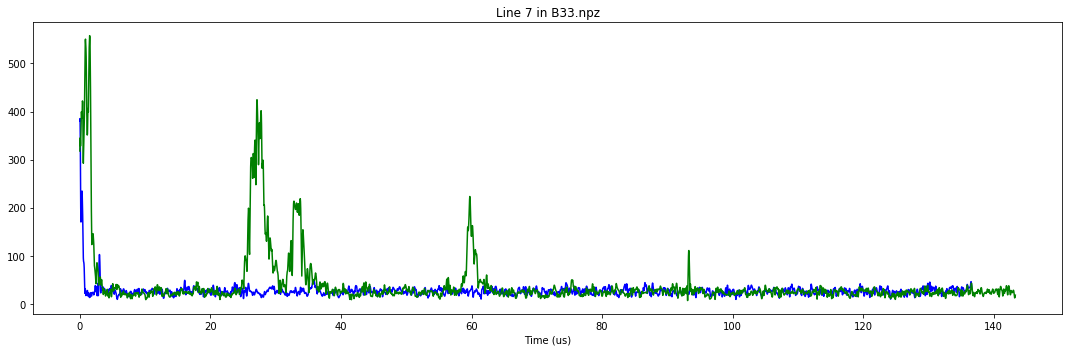

In [98]:
for filename in os.listdir("./"):
    if filename.endswith(".npz") and filename.startswith("B"):
        DATFile = os.path.join("", filename).split(".")[0] 
        print DATFile+".DAT"
        PlotLine(DATFile)